In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib
import csv

In [2]:
hw_weekly = pd.read_csv("weekly_hard_1999_2022.csv", index_col="end_date", parse_dates=[1])
hw_weekly.

In [48]:
hw = hw_weekly.drop("begin_date", axis=1)
hw["hw"]

end_date
1998-10-18        PS
1998-10-18        GB
1998-10-18       N64
1998-10-18    SATURN
1998-10-25        GB
               ...  
2022-05-22       3DS
2022-05-22    Switch
2022-05-22       PS4
2022-05-22       PS5
2022-05-22       XSX
Name: hw, Length: 7794, dtype: object

In [45]:
def single_df(df, hwname):
    df2 = df[df['hw'] == hwname].drop("hw", axis=1).rename(columns={"units":hwname})
    return df2

In [46]:
saturn_df = single_df(hw, "SATURN")
saturn_df

,SATURN
end_date,
1998-10-18,858
1998-10-25,1061
1998-11-01,1027
1998-11-08,824
1998-11-15,1144
1998-11-22,528


In [94]:
hw_weekly_df = pd.read_pickle("weekly_hard_1999_2022.pkl")
HW = ['3DS', 'DC','DS', 'GB', 'GBA', 'GC', 'N64', 'NeoGeoP', 'Switch',
    'PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'WS', 'SATURN', 'Vita',
    'Wii', 'WiiU', 'XB360', 'XBOne','XSX', 'Xbox', 'PKS']
hw_dfs = {}
for h in HW:
    hw_dfs[h] = single_df(hw_weekly_df, h)


In [95]:
hw_dfs_list = []
for h in HW[1:]:
    hw_dfs_list.append(hw_dfs[h])


In [96]:
weekly_hw_df = hw_dfs['3DS'].join(hw_dfs_list, how="outer")

In [102]:
weekly_hw_df.to_csv("hard_weekly.csv")

In [101]:
weekly_hw_df[["PS5", "PS4"]]

,PS5,PS4
end_date,,
1998-10-18,NaN,NaN
1998-10-25,NaN,NaN
1998-11-01,NaN,NaN
1998-11-08,NaN,NaN
1998-11-15,NaN,NaN
...,...,...
2022-04-24,17681.0,12.0
2022-05-01,24899.0,40.0
2022-05-08,24899.0,40.0


In [88]:
sp = hw_dfs['Switch'].join([hw_dfs['PS5'], hw_dfs['PS4'], hw_dfs['WiiU'],
                            hw_dfs['PS3'], hw_dfs['3DS'], hw_dfs['Wii'], hw_dfs['DS'], hw_dfs['XBOne']], how="outer")
sp

,Switch,PS5,PS4,WiiU,PS3,3DS,Wii,DS,XBOne
end_date,,,,,,,,,
2004-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441485.0,NaN
2004-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181231.0,NaN
2004-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220295.0,NaN
2004-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213417.0,NaN
2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213417.0,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-24,57490.0,17681.0,12.0,NaN,NaN,205.0,NaN,NaN,NaN
2022-05-01,88296.0,24899.0,40.0,NaN,NaN,226.0,NaN,NaN,NaN
2022-05-08,88296.0,24899.0,40.0,NaN,NaN,226.0,NaN,NaN,NaN


<AxesSubplot:xlabel='end_date'>

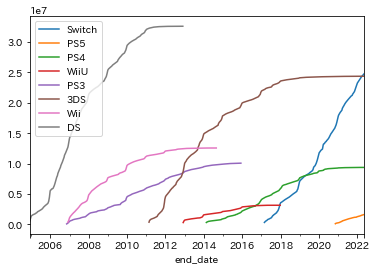

In [78]:
hard_frame
#for h in HW[1:-1]:
#    print(f'------{h}-------')
#    print(hw_dfs[h])
    # hard_frame = hard_frame.join(hw_dfs[h], lsuffix="_left", how="outer")

#hard_frame
sp = hw_dfs['Switch'].join([hw_dfs['PS5'], hw_dfs['PS4'], hw_dfs['WiiU'], hw_dfs['PS3'], hw_dfs['3DS'], hw_dfs['Wii'], hw_dfs['DS']], how="outer")
sp.cumsum().plot()


<AxesSubplot:xlabel='end_date'>

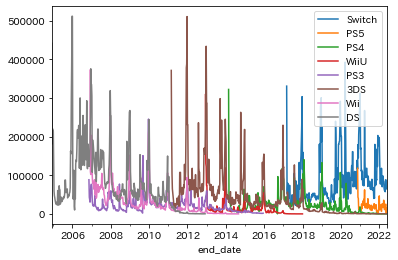

In [79]:
sp.plot()